# EPL 승부 예측 모델링
* 전처리 한 데이터 (epl_data3, epl_test5)를 활용하여 21/3/8부터의 경기 결과를 예측한다.  
* 코드진행의 원활히 하기위해 팀명 -> 번호(알파벳 순), 경기 결과(H->3, D->1, A->0)을 숫자로 변환  
* 풀타임 득점은 이미 결과를 의미하기에 삭제했다.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

## 데이터 불러오기

In [2]:
train_df=pd.read_excel('D:/python_for_prepare/project/epl_data3.xlsx')
test_df=pd.read_excel('D:/python_for_prepare/project/epl_test5.xlsx')

In [3]:
train=train_df.drop(['Unnamed: 0','시즌','날짜','홈팀 풀타임 득점','어웨이팀 풀타임 득점'],axis=1)
train.head()

,홈팀,어웨이팀,경기결과,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,하프타임 득점 차,홈팀 점유율,홈팀 패스,홈팀 터치,...,홈팀 태클,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드
0,2,34,H,H,2,0,2,56.8,395,636,...,27,18,1,1,16,1,0,16,2,0
1,4,12,H,H,1,0,1,30.4,208,450,...,15,16,3,2,20,2,0,16,1,0
2,6,13,D,D,0,0,0,46.5,336,592,...,26,18,5,3,11,1,0,14,3,0
3,10,33,H,H,2,0,2,59.5,592,782,...,16,20,3,1,12,1,0,10,0,0
4,29,3,D,H,1,0,1,44.1,304,514,...,9,16,2,1,15,2,1,10,3,0


In [4]:
test=test_df.drop(['Unnamed: 0','시즌','날짜','경기결과','홈팀 풀타임 득점','어웨이팀 풀타임 득점'],axis=1)
test.head()

,홈팀,어웨이팀,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,하프타임 득점 차,홈팀 점유율,홈팀 패스,홈팀 터치,홈팀 슈팅,...,홈팀 태클,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드
0,31,11,D,1,1,0,64.2,690,887,12,...,27,18,1,4,8,2,0,17,3,0
1,10,12,H,1,0,1,65.5,713,882,19,...,18,10,1,0,11,0,0,12,3,0
2,34,16,H,2,0,2,34.7,276,458,16,...,14,19,1,1,9,1,0,9,1,0
3,19,27,H,3,1,2,58.3,673,848,17,...,8,22,1,4,6,1,0,4,0,0
4,22,2,D,0,0,0,49.2,392,595,12,...,20,16,0,4,10,2,0,10,3,0


## 경기결과 수치화

In [5]:
def test1(x):
    if x == 'H': return 3
    elif x=='D': return 1
    else: return 0

In [6]:
train['경기결과']=train['경기결과'].apply(test1)
train['하프타임 결과']=train['하프타임 결과'].apply(test1)
test['하프타임 결과']=test['하프타임 결과'].apply(test1)

In [7]:
data=train.drop('경기결과',axis=1).values
target=train['경기결과'].values

### train -test-split
* 현재 test데이터가 따로 존재하여 split으로 검증 데이터 생성

In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.3, stratify=target, random_state=0)

### 검증결과

In [9]:
rf = RandomForestClassifier(n_estimators=300,criterion="entropy", max_depth=10, oob_score=True, random_state=10)
rf.fit(x_train, y_train)
prediction = rf.predict(x_valid)

length = y_valid.shape[0]
accuracy = accuracy_score(prediction, y_valid)
print(f'총 {length}개 중 {accuracy * 100:.3f}% 정확도로 승리를 맞춤')

총 1222개 중 65.221% 정확도로 승리를 맞춤


## 다른 모델들과의 비교

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
data=train.drop('경기결과',axis=1).values
target=train['경기결과'].values
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.3, stratify=target, random_state=0)

In [12]:
def ml_fit(model):
    model.fit(x_train, y_train)
    prediction = model.predict(x_valid)
    accuracy = accuracy_score(prediction, y_valid)
    print(model)
    print(f'총 {y_valid.shape[0]}개 중 {accuracy * 100:.3f}% 정확도로 승리를 맞춤')
    return model

### 각 모델 간 정확도 비교
- 비교 결과 RandomForestClassifier가 가장 정확도가 높게 나오는 것을 확인

In [13]:
model = ml_fit(RandomForestClassifier(n_estimators=300))
model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

RandomForestClassifier(n_estimators=300)
총 1222개 중 65.630% 정확도로 승리를 맞춤
LogisticRegression()
총 1222개 중 61.784% 정확도로 승리를 맞춤


C:\Users\sjh96\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()
총 1222개 중 47.300% 정확도로 승리를 맞춤
KNeighborsClassifier()
총 1222개 중 40.671% 정확도로 승리를 맞춤
GaussianNB()
총 1222개 중 64.484% 정확도로 승리를 맞춤
DecisionTreeClassifier()
총 1222개 중 57.938% 정확도로 승리를 맞춤


In [14]:
model = ml_fit(RandomForestClassifier(n_estimators=300, criterion="entropy", max_depth=10, oob_score=True, random_state=10))

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300,
                       oob_score=True, random_state=10)
총 1222개 중 65.221% 정확도로 승리를 맞춤


## 예측 결과

In [15]:
prediction = rf.predict(test)
prediction 

array([3, 3, 3, 3, 0, 0, 3, 0, 0, 1, 3, 1, 3, 0, 3, 3, 3, 0, 0, 3, 1, 0,
       3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 0, 0, 3, 3, 3, 0, 3, 0, 1, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 1, 3, 0, 1, 0, 0, 0, 3, 1, 0, 3, 0, 0,
       3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0],
      dtype=int64)

In [16]:
team_name=pd.read_excel('D:\python_for_prepare\project\epl_test6.xlsx')

In [17]:
test['경기결과']=prediction
test['홈팀']=team_name['홈팀']
test['어웨이팀']=team_name['어웨이팀']
test['시즌']=team_name['시즌']
test['날짜']=team_name['날짜']
test

,홈팀,어웨이팀,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,하프타임 득점 차,홈팀 점유율,홈팀 패스,홈팀 터치,홈팀 슈팅,...,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드,경기결과,시즌,날짜
0,Tottenham Hotspur,Crystal Palace,1,1,1,0,64.2,690,887,12,...,4,8,2,0,17,3,0,3,20/21,2021-03-07
1,Chelsea,Everton,3,1,0,1,65.5,713,882,19,...,0,11,0,0,12,3,0,3,20/21,2021-03-08
2,West Ham United,Leeds United,3,2,0,2,34.7,276,458,16,...,1,9,1,0,9,1,0,3,20/21,2021-03-08
3,Manchester City,Southampton,3,3,1,2,58.3,673,848,17,...,4,6,1,0,4,0,0,3,20/21,2021-03-10
4,Newcastle United,Aston Villa,1,0,0,0,49.2,392,595,12,...,4,10,2,0,10,3,0,0,20/21,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Liverpool,Crystal Palace,3,1,0,1,69.6,588,780,19,...,1,10,2,0,8,2,0,3,20/21,2021-05-23
104,Manchester City,Everton,3,2,0,2,67.7,725,893,21,...,1,8,2,0,10,2,0,3,20/21,2021-05-23
105,Sheffield United,Burnley,3,1,0,1,43.0,361,552,12,...,1,11,3,0,1,1,0,3,20/21,2021-05-23
106,West Ham United,Southampton,3,2,0,2,36.9,300,483,14,...,1,5,0,0,9,3,0,3,20/21,2021-05-23


In [18]:
test.keys()

Index(['홈팀', '어웨이팀', '하프타임 결과', '홈팀 하프타임 득점', '어웨이팀 하프타임 득점', '하프타임 득점 차',
       '홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅', '홈팀 유효슈팅', '어웨이팀 점유율', '어웨이팀 패스',
       '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅', '홈팀 코너킥', '어웨이팀 코너킥', '홈팀 태클',
       '어웨이팀 태클', '홈팀 오프사이드', '어웨이팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드',
       '어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드', '경기결과', '시즌', '날짜'],
      dtype='object')

### 결과 데이터의 컬럼 순서 재배열

In [19]:
test=test[['시즌','날짜','홈팀', '어웨이팀','경기결과','하프타임 결과','홈팀 하프타임 득점', '어웨이팀 하프타임 득점', '하프타임 득점 차', '홈팀 점유율', '홈팀 터치', '홈팀 슈팅',
       '홈팀 유효슈팅', '어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '홈팀 코너킥', '어웨이팀 코너킥', '홈팀 태클', '어웨이팀 태클', '홈팀 오프사이드', '어웨이팀 오프사이드',
       '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드', '어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드']]
test

,시즌,날짜,홈팀,어웨이팀,경기결과,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,하프타임 득점 차,홈팀 점유율,...,홈팀 태클,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드
0,20/21,2021-03-07,Tottenham Hotspur,Crystal Palace,3,1,1,1,0,64.2,...,27,18,1,4,8,2,0,17,3,0
1,20/21,2021-03-08,Chelsea,Everton,3,3,1,0,1,65.5,...,18,10,1,0,11,0,0,12,3,0
2,20/21,2021-03-08,West Ham United,Leeds United,3,3,2,0,2,34.7,...,14,19,1,1,9,1,0,9,1,0
3,20/21,2021-03-10,Manchester City,Southampton,3,3,3,1,2,58.3,...,8,22,1,4,6,1,0,4,0,0
4,20/21,2021-03-12,Newcastle United,Aston Villa,0,1,0,0,0,49.2,...,20,16,0,4,10,2,0,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20/21,2021-05-23,Liverpool,Crystal Palace,3,3,1,0,1,69.6,...,15,24,2,1,10,2,0,8,2,0
104,20/21,2021-05-23,Manchester City,Everton,3,3,2,0,2,67.7,...,10,12,1,1,8,2,0,10,2,0
105,20/21,2021-05-23,Sheffield United,Burnley,3,3,1,0,1,43.0,...,19,16,2,1,11,3,0,1,1,0
106,20/21,2021-05-23,West Ham United,Southampton,3,3,2,0,2,36.9,...,12,23,2,1,5,0,0,9,3,0


### 수치화 시켰던 경기 결과를 다시 되돌리기

In [20]:
def reverse_test(x):
    if x == 3: return 'H'
    elif x==1: return 'D'
    else: return 'A'

In [21]:
test['경기결과']=test['경기결과'].apply(reverse_test)

<ipython-input-21-db34389592ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['경기결과']=test['경기결과'].apply(reverse_test)


In [22]:
test

,시즌,날짜,홈팀,어웨이팀,경기결과,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,하프타임 득점 차,홈팀 점유율,...,홈팀 태클,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드
0,20/21,2021-03-07,Tottenham Hotspur,Crystal Palace,H,1,1,1,0,64.2,...,27,18,1,4,8,2,0,17,3,0
1,20/21,2021-03-08,Chelsea,Everton,H,3,1,0,1,65.5,...,18,10,1,0,11,0,0,12,3,0
2,20/21,2021-03-08,West Ham United,Leeds United,H,3,2,0,2,34.7,...,14,19,1,1,9,1,0,9,1,0
3,20/21,2021-03-10,Manchester City,Southampton,H,3,3,1,2,58.3,...,8,22,1,4,6,1,0,4,0,0
4,20/21,2021-03-12,Newcastle United,Aston Villa,A,1,0,0,0,49.2,...,20,16,0,4,10,2,0,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20/21,2021-05-23,Liverpool,Crystal Palace,H,3,1,0,1,69.6,...,15,24,2,1,10,2,0,8,2,0
104,20/21,2021-05-23,Manchester City,Everton,H,3,2,0,2,67.7,...,10,12,1,1,8,2,0,10,2,0
105,20/21,2021-05-23,Sheffield United,Burnley,H,3,1,0,1,43.0,...,19,16,2,1,11,3,0,1,1,0
106,20/21,2021-05-23,West Ham United,Southampton,H,3,2,0,2,36.9,...,12,23,2,1,5,0,0,9,3,0


## 결과에 가장 영향을 많이 주는 변수 확인

In [23]:
import matplotlib.pyplot as plt
from pandas import Series
from matplotlib import font_manager,rc
plt.rcParams['axes.unicode_minus']=False
f_path='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

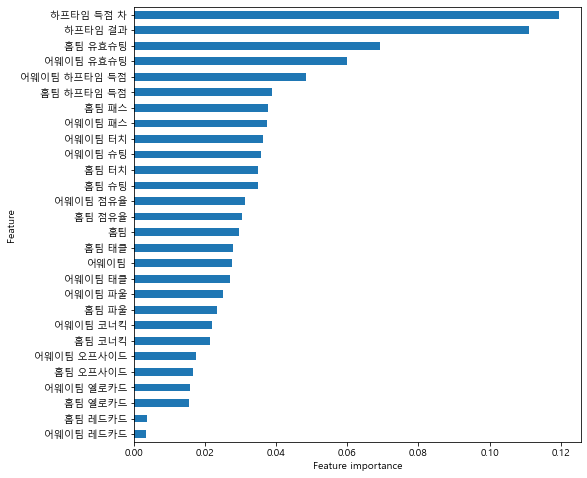

In [24]:
feature_importance = rf.feature_importances_
fi = Series(feature_importance, index=train.drop(['경기결과'],axis=1).columns)

plt.figure(figsize=(8, 8))
fi.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [25]:
#test.to_csv('D:/python_for_prepare/project/prediction_result.csv',encoding='utf-8-sig')

## 실제 결과와의 차이를 알아보자

In [26]:
pl_raw1=pd.read_excel('d:/python_for_prepare/project/epl_data4.xlsx')
pl_raw1.drop('Unnamed: 0',axis=1,inplace=True)
pl_raw1

,시즌,날짜,홈팀,어웨이팀,경기결과,홈팀 풀타임 득점,어웨이팀 풀타임 득점,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,...,홈팀 태클,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드
0,10/11,2010-08-14,Aston Villa,West Ham United,H,3,0,H,2,0,...,27,18,1,1,16,1,0,16,2,0
1,10/11,2010-08-14,Blackburn Rovers,Everton,H,1,0,H,1,0,...,15,16,3,2,20,2,0,16,1,0
2,10/11,2010-08-14,Bolton Wanderers,Fulham,D,0,0,D,0,0,...,26,18,5,3,11,1,0,14,3,0
3,10/11,2010-08-14,Chelsea,West Bromwich Albion,H,6,0,H,2,0,...,16,20,3,1,12,1,0,10,0,0
4,10/11,2010-08-14,Sunderland,Birmingham City,D,2,2,H,1,0,...,9,16,2,1,15,2,1,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,20/21,2021-03-06,Burnley,Arsenal,D,1,1,D,1,1,...,15,12,2,2,5,1,1,12,1,0
4068,20/21,2021-03-06,Sheffield United,Southampton,A,0,2,A,0,1,...,16,17,2,2,17,4,0,11,3,0
4069,20/21,2021-03-07,Liverpool,Fulham,A,0,1,A,0,1,...,13,15,3,1,10,2,0,8,3,0
4070,20/21,2021-03-07,Manchester City,Manchester United,A,0,2,A,0,1,...,17,13,0,1,9,0,0,12,3,0


In [27]:
pl_raw2=pd.read_excel('D:/python_for_prepare/project/epl_test6.xlsx')
pl_raw2

,Unnamed: 0,시즌,날짜,홈팀,어웨이팀,경기결과,홈팀 풀타임 득점,어웨이팀 풀타임 득점,하프타임 결과,홈팀 하프타임 득점,...,홈팀 태클,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드
0,0,20/21,2021-03-07,Tottenham Hotspur,Crystal Palace,H,4,1,D,1,...,27,18,1,4,8,2,0,17,3,0
1,1,20/21,2021-03-08,Chelsea,Everton,H,2,0,H,1,...,18,10,1,0,11,0,0,12,3,0
2,2,20/21,2021-03-08,West Ham United,Leeds United,H,2,0,H,2,...,14,19,1,1,9,1,0,9,1,0
3,3,20/21,2021-03-10,Manchester City,Southampton,H,5,2,H,3,...,8,22,1,4,6,1,0,4,0,0
4,4,20/21,2021-03-12,Newcastle United,Aston Villa,D,1,1,D,0,...,20,16,0,4,10,2,0,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,20/21,2021-05-23,Liverpool,Crystal Palace,H,2,0,H,1,...,15,24,2,1,10,2,0,8,2,0
104,104,20/21,2021-05-23,Manchester City,Everton,H,5,0,H,2,...,10,12,1,1,8,2,0,10,2,0
105,105,20/21,2021-05-23,Sheffield United,Burnley,H,1,0,H,1,...,19,16,2,1,11,3,0,1,1,0
106,106,20/21,2021-05-23,West Ham United,Southampton,H,3,0,H,2,...,12,23,2,1,5,0,0,9,3,0


In [28]:
pl_df=pd.concat([pl_raw1,pl_raw2])
pl_result=pd.concat([pl_raw1,test])

### 실제 데이터

In [29]:
pl_df

,시즌,날짜,홈팀,어웨이팀,경기결과,홈팀 풀타임 득점,어웨이팀 풀타임 득점,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,...,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드,Unnamed: 0
0,10/11,2010-08-14,Aston Villa,West Ham United,H,3,0,H,2,0,...,18,1,1,16,1,0,16,2,0,NaN
1,10/11,2010-08-14,Blackburn Rovers,Everton,H,1,0,H,1,0,...,16,3,2,20,2,0,16,1,0,NaN
2,10/11,2010-08-14,Bolton Wanderers,Fulham,D,0,0,D,0,0,...,18,5,3,11,1,0,14,3,0,NaN
3,10/11,2010-08-14,Chelsea,West Bromwich Albion,H,6,0,H,2,0,...,20,3,1,12,1,0,10,0,0,NaN
4,10/11,2010-08-14,Sunderland,Birmingham City,D,2,2,H,1,0,...,16,2,1,15,2,1,10,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20/21,2021-05-23,Liverpool,Crystal Palace,H,2,0,H,1,0,...,24,2,1,10,2,0,8,2,0,103.0
104,20/21,2021-05-23,Manchester City,Everton,H,5,0,H,2,0,...,12,1,1,8,2,0,10,2,0,104.0
105,20/21,2021-05-23,Sheffield United,Burnley,H,1,0,H,1,0,...,16,2,1,11,3,0,1,1,0,105.0
106,20/21,2021-05-23,West Ham United,Southampton,H,3,0,H,2,0,...,23,2,1,5,0,0,9,3,0,106.0


### 예측 결과 데이터

In [30]:
pl_result

,시즌,날짜,홈팀,어웨이팀,경기결과,홈팀 풀타임 득점,어웨이팀 풀타임 득점,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,...,홈팀 태클,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드
0,10/11,2010-08-14,Aston Villa,West Ham United,H,3.0,0.0,H,2,0,...,27,18,1,1,16,1,0,16,2,0
1,10/11,2010-08-14,Blackburn Rovers,Everton,H,1.0,0.0,H,1,0,...,15,16,3,2,20,2,0,16,1,0
2,10/11,2010-08-14,Bolton Wanderers,Fulham,D,0.0,0.0,D,0,0,...,26,18,5,3,11,1,0,14,3,0
3,10/11,2010-08-14,Chelsea,West Bromwich Albion,H,6.0,0.0,H,2,0,...,16,20,3,1,12,1,0,10,0,0
4,10/11,2010-08-14,Sunderland,Birmingham City,D,2.0,2.0,H,1,0,...,9,16,2,1,15,2,1,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20/21,2021-05-23,Liverpool,Crystal Palace,H,NaN,NaN,3,1,0,...,15,24,2,1,10,2,0,8,2,0
104,20/21,2021-05-23,Manchester City,Everton,H,NaN,NaN,3,2,0,...,10,12,1,1,8,2,0,10,2,0
105,20/21,2021-05-23,Sheffield United,Burnley,H,NaN,NaN,3,1,0,...,19,16,2,1,11,3,0,1,1,0
106,20/21,2021-05-23,West Ham United,Southampton,H,NaN,NaN,3,2,0,...,12,23,2,1,5,0,0,9,3,0


### 20/21시즌 데이터 분리
* 예측한 시즌이 20/21시즌 후반부이기 때문

In [31]:
pl_df=pl_df[pl_df['시즌']=='20/21']
pl_result=pl_result[pl_result['시즌']=='20/21']

In [32]:
pl_df

,시즌,날짜,홈팀,어웨이팀,경기결과,홈팀 풀타임 득점,어웨이팀 풀타임 득점,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,...,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드,Unnamed: 0
3800,20/21,2020-09-12,Crystal Palace,Southampton,H,1,0,H,1,0,...,28,4,0,14,2,0,11,1,1,NaN
3801,20/21,2020-09-12,Fulham,Arsenal,A,0,3,A,0,1,...,12,2,2,12,2,0,12,2,0,NaN
3802,20/21,2020-09-12,Liverpool,Leeds United,H,4,3,H,3,2,...,34,2,5,9,1,0,6,0,0,NaN
3803,20/21,2020-09-12,West Ham United,Newcastle United,A,0,2,D,0,0,...,13,2,4,13,2,0,7,2,0,NaN
3804,20/21,2020-09-13,Tottenham Hotspur,Everton,A,0,1,D,0,0,...,19,0,1,15,1,0,7,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20/21,2021-05-23,Liverpool,Crystal Palace,H,2,0,H,1,0,...,24,2,1,10,2,0,8,2,0,103.0
104,20/21,2021-05-23,Manchester City,Everton,H,5,0,H,2,0,...,12,1,1,8,2,0,10,2,0,104.0
105,20/21,2021-05-23,Sheffield United,Burnley,H,1,0,H,1,0,...,16,2,1,11,3,0,1,1,0,105.0
106,20/21,2021-05-23,West Ham United,Southampton,H,3,0,H,2,0,...,23,2,1,5,0,0,9,3,0,106.0


In [33]:
pl_result

,시즌,날짜,홈팀,어웨이팀,경기결과,홈팀 풀타임 득점,어웨이팀 풀타임 득점,하프타임 결과,홈팀 하프타임 득점,어웨이팀 하프타임 득점,...,홈팀 태클,어웨이팀 태클,홈팀 오프사이드,어웨이팀 오프사이드,홈팀 파울,홈팀 엘로카드,홈팀 레드카드,어웨이팀 파울,어웨이팀 엘로카드,어웨이팀 레드카드
3800,20/21,2020-09-12,Crystal Palace,Southampton,H,1.0,0.0,H,1,0,...,15,28,4,0,14,2,0,11,1,1
3801,20/21,2020-09-12,Fulham,Arsenal,A,0.0,3.0,A,0,1,...,11,12,2,2,12,2,0,12,2,0
3802,20/21,2020-09-12,Liverpool,Leeds United,H,4.0,3.0,H,3,2,...,13,34,2,5,9,1,0,6,0,0
3803,20/21,2020-09-12,West Ham United,Newcastle United,A,0.0,2.0,D,0,0,...,14,13,2,4,13,2,0,7,2,0
3804,20/21,2020-09-13,Tottenham Hotspur,Everton,A,0.0,1.0,D,0,0,...,9,19,0,1,15,1,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20/21,2021-05-23,Liverpool,Crystal Palace,H,NaN,NaN,3,1,0,...,15,24,2,1,10,2,0,8,2,0
104,20/21,2021-05-23,Manchester City,Everton,H,NaN,NaN,3,2,0,...,10,12,1,1,8,2,0,10,2,0
105,20/21,2021-05-23,Sheffield United,Burnley,H,NaN,NaN,3,1,0,...,19,16,2,1,11,3,0,1,1,0
106,20/21,2021-05-23,West Ham United,Southampton,H,NaN,NaN,3,2,0,...,12,23,2,1,5,0,0,9,3,0


### 불필요한 컬럼 제거

In [34]:
pl_df.drop(['시즌','홈팀 풀타임 득점','어웨이팀 풀타임 득점','하프타임 결과','홈팀 하프타임 득점', '어웨이팀 하프타임 득점', '하프타임 득점 차'],
           axis=1,inplace=True)
pl_result.drop(['시즌','홈팀 풀타임 득점','어웨이팀 풀타임 득점','하프타임 결과','홈팀 하프타임 득점', '어웨이팀 하프타임 득점', '하프타임 득점 차'],
           axis=1,inplace=True)

C:\Users\sjh96\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 실제데이터에서 각 팀별 홈경기, 어웨이경기 분류

In [35]:
man_c_h=pl_df[pl_df['홈팀']=='Manchester City'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
man_u_h=pl_df[pl_df['홈팀']=='Manchester United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
liv_h=pl_df[pl_df['홈팀']=='Liverpool'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
chel_h=pl_df[pl_df['홈팀']=='Chelsea'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
lei_h=pl_df[pl_df['홈팀']=='Leicester City'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
west_ham_h=pl_df[pl_df['홈팀']=='West Ham United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
tot_h=pl_df[pl_df['홈팀']=='Tottenham Hotspur'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
ars_h=pl_df[pl_df['홈팀']=='Arsenal'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
leeds_h=pl_df[pl_df['홈팀']=='Leeds United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
eve_h=pl_df[pl_df['홈팀']=='Everton'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
aston_h=pl_df[pl_df['홈팀']=='Aston Villa'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
new_h=pl_df[pl_df['홈팀']=='Newcastle United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
wol_h=pl_df[pl_df['홈팀']=='Wolverhampton Wanderers'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
crys_h=pl_df[pl_df['홈팀']=='Crystal Palace'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
south_h=pl_df[pl_df['홈팀']=='Southampton'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
brighton_h=pl_df[pl_df['홈팀']=='Brighton and Hove Albion'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
burn_h=pl_df[pl_df['홈팀']=='Burnley'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
full_h=pl_df[pl_df['홈팀']=='Fulham'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
west_brom_h=pl_df[pl_df['홈팀']=='West Bromwich Albion'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
shef_h=pl_df[pl_df['홈팀']=='Sheffield United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)

man_c_a=pl_df[pl_df['어웨이팀']=='Manchester City'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
man_u_a=pl_df[pl_df['어웨이팀']=='Manchester United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
liv_a=pl_df[pl_df['어웨이팀']=='Liverpool'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
chel_a=pl_df[pl_df['어웨이팀']=='Chelsea'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
lei_a=pl_df[pl_df['어웨이팀']=='Leicester City'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
west_ham_a=pl_df[pl_df['어웨이팀']=='West Ham United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
tot_a=pl_df[pl_df['어웨이팀']=='Tottenham Hotspur'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
ars_a=pl_df[pl_df['어웨이팀']=='Arsenal'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
leeds_a=pl_df[pl_df['어웨이팀']=='Leeds United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
eve_a=pl_df[pl_df['어웨이팀']=='Everton'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
aston_a=pl_df[pl_df['어웨이팀']=='Aston Villa'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
new_a=pl_df[pl_df['어웨이팀']=='Newcastle United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
wol_a=pl_df[pl_df['어웨이팀']=='Wolverhampton Wanderers'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
crys_a=pl_df[pl_df['어웨이팀']=='Crystal Palace'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
south_a=pl_df[pl_df['어웨이팀']=='Southampton'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
brighton_a=pl_df[pl_df['어웨이팀']=='Brighton and Hove Albion'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
burn_a=pl_df[pl_df['어웨이팀']=='Burnley'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
full_a=pl_df[pl_df['어웨이팀']=='Fulham'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
west_brom_a=pl_df[pl_df['어웨이팀']=='West Bromwich Albion'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
shef_a=pl_df[pl_df['어웨이팀']=='Sheffield United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)

### 컬럼명 재설정

In [36]:
man_c_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
man_u_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
liv_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
chel_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
lei_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
west_ham_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
tot_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
ars_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
leeds_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
eve_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
aston_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
new_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
wol_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
crys_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
south_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
brighton_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
burn_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
full_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
west_brom_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
shef_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)

man_c_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
man_u_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
liv_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
chel_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
lei_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
west_ham_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
tot_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
ars_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
leeds_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
eve_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
aston_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
new_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
wol_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
crys_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
south_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
brighton_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
burn_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
full_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
west_brom_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
shef_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)

### 경기 결과  -> 승점

In [37]:
def home(x):
    if x=='H':return 3
    elif x=='D':return 1
    else: return 0
def away(y):
    if y=='A':return 3
    elif y=='D':return 1
    else: return 0

In [38]:
man_c_h['경기결과']=man_c_h['경기결과'].apply(home)
man_u_h['경기결과']=man_u_h['경기결과'].apply(home)
liv_h['경기결과']=liv_h['경기결과'].apply(home)
chel_h['경기결과']=chel_h['경기결과'].apply(home)
lei_h['경기결과']=lei_h['경기결과'].apply(home)
west_ham_h['경기결과']=west_ham_h['경기결과'].apply(home)
tot_h['경기결과']=tot_h['경기결과'].apply(home)
ars_h['경기결과']=ars_h['경기결과'].apply(home)
leeds_h['경기결과']=leeds_h['경기결과'].apply(home)
eve_h['경기결과']=eve_h['경기결과'].apply(home)
aston_h['경기결과']=aston_h['경기결과'].apply(home)
new_h['경기결과']=new_h['경기결과'].apply(home)
wol_h['경기결과']=wol_h['경기결과'].apply(home)
crys_h['경기결과']=crys_h['경기결과'].apply(home)
south_h['경기결과']=south_h['경기결과'].apply(home)
brighton_h['경기결과']=brighton_h['경기결과'].apply(home)
burn_h['경기결과']=burn_h['경기결과'].apply(home)
full_h['경기결과']=full_h['경기결과'].apply(home)
west_brom_h['경기결과']=west_brom_h['경기결과'].apply(home)
shef_h['경기결과']=shef_h['경기결과'].apply(home)

man_c_a['경기결과']=man_c_a['경기결과'].apply(away)
man_u_a['경기결과']=man_u_a['경기결과'].apply(away)
liv_a['경기결과']=liv_a['경기결과'].apply(away)
chel_a['경기결과']=chel_a['경기결과'].apply(away)
lei_a['경기결과']=lei_a['경기결과'].apply(away)
west_ham_a['경기결과']=west_ham_a['경기결과'].apply(away)
tot_a['경기결과']=tot_a['경기결과'].apply(away)
ars_a['경기결과']=ars_a['경기결과'].apply(away)
leeds_a['경기결과']=leeds_a['경기결과'].apply(away)
eve_a['경기결과']=eve_a['경기결과'].apply(away)
aston_a['경기결과']=aston_a['경기결과'].apply(away)
new_a['경기결과']=new_a['경기결과'].apply(away)
wol_a['경기결과']=wol_a['경기결과'].apply(away)
crys_a['경기결과']=crys_a['경기결과'].apply(away)
south_a['경기결과']=south_a['경기결과'].apply(away)
brighton_a['경기결과']=brighton_a['경기결과'].apply(away)
burn_a['경기결과']=burn_a['경기결과'].apply(away)
full_a['경기결과']=full_a['경기결과'].apply(away)
west_brom_a['경기결과']=west_brom_a['경기결과'].apply(away)
shef_a['경기결과']=shef_a['경기결과'].apply(away)

In [39]:
ManC_df=pd.concat([man_c_h,man_c_a]).set_index('날짜')
ManU_df=pd.concat([man_u_h,man_u_a]).set_index('날짜')
Liv_df=pd.concat([liv_h,liv_a]).set_index('날짜')
Chelsea_df=pd.concat([chel_h,chel_a]).set_index('날짜')
Leicester_df=pd.concat([lei_h,lei_a]).set_index('날짜')
WestHam_df=pd.concat([west_ham_h,west_ham_a]).set_index('날짜')
Tot_df=pd.concat([tot_h,tot_a]).set_index('날짜')
Arsenal_df=pd.concat([ars_h,ars_a]).set_index('날짜')
Leeds_df=pd.concat([leeds_h,leeds_a]).set_index('날짜')
Everton_df=pd.concat([eve_h,eve_a]).set_index('날짜')
Aston_df=pd.concat([aston_h,aston_a]).set_index('날짜')
Newcastle_df=pd.concat([new_h,new_a]).set_index('날짜')
Wolve_df=pd.concat([wol_h,wol_a]).set_index('날짜')
Crystal_df=pd.concat([crys_h,crys_a]).set_index('날짜')
South_df=pd.concat([south_h,south_a]).set_index('날짜')
Brighton_df=pd.concat([brighton_h,brighton_a]).set_index('날짜')
Burnley_df=pd.concat([burn_h,burn_a]).set_index('날짜')
Fullham_df=pd.concat([full_h,full_a]).set_index('날짜')
WestBrom_df=pd.concat([west_brom_h,west_brom_a]).set_index('날짜')
Sheffield_df=pd.concat([shef_h,shef_a]).set_index('날짜')

### 예측데이터에서  각 팀별 홈경기, 어웨이경기 분류

In [40]:
man_c_h=pl_result[pl_result['홈팀']=='Manchester City'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
man_u_h=pl_result[pl_result['홈팀']=='Manchester United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
liv_h=pl_result[pl_result['홈팀']=='Liverpool'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
chel_h=pl_result[pl_result['홈팀']=='Chelsea'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
lei_h=pl_result[pl_result['홈팀']=='Leicester City'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
west_ham_h=pl_result[pl_result['홈팀']=='West Ham United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
tot_h=pl_result[pl_result['홈팀']=='Tottenham Hotspur'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
ars_h=pl_result[pl_result['홈팀']=='Arsenal'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
leeds_h=pl_result[pl_result['홈팀']=='Leeds United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
eve_h=pl_result[pl_result['홈팀']=='Everton'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
aston_h=pl_result[pl_result['홈팀']=='Aston Villa'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
new_h=pl_result[pl_result['홈팀']=='Newcastle United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
wol_h=pl_result[pl_result['홈팀']=='Wolverhampton Wanderers'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
crys_h=pl_result[pl_result['홈팀']=='Crystal Palace'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
south_h=pl_result[pl_result['홈팀']=='Southampton'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
brighton_h=pl_result[pl_result['홈팀']=='Brighton and Hove Albion'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
burn_h=pl_result[pl_result['홈팀']=='Burnley'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
full_h=pl_result[pl_result['홈팀']=='Fulham'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
west_brom_h=pl_result[pl_result['홈팀']=='West Bromwich Albion'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)
shef_h=pl_result[pl_result['홈팀']=='Sheffield United'].drop(['어웨이팀 점유율', '어웨이팀 패스', '어웨이팀 터치', '어웨이팀 슈팅', '어웨이팀 유효슈팅',
       '어웨이팀 코너킥', '어웨이팀 태클', '어웨이팀 오프사이드','어웨이팀 파울', '어웨이팀 엘로카드', '어웨이팀 레드카드'],axis=1)

man_c_a=pl_result[pl_result['어웨이팀']=='Manchester City'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
man_u_a=pl_result[pl_result['어웨이팀']=='Manchester United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
liv_a=pl_result[pl_result['어웨이팀']=='Liverpool'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
chel_a=pl_result[pl_result['어웨이팀']=='Chelsea'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
lei_a=pl_result[pl_result['어웨이팀']=='Leicester City'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
west_ham_a=pl_result[pl_result['어웨이팀']=='West Ham United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
tot_a=pl_result[pl_result['어웨이팀']=='Tottenham Hotspur'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
ars_a=pl_result[pl_result['어웨이팀']=='Arsenal'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
leeds_a=pl_result[pl_result['어웨이팀']=='Leeds United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
eve_a=pl_result[pl_result['어웨이팀']=='Everton'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
aston_a=pl_result[pl_result['어웨이팀']=='Aston Villa'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
new_a=pl_result[pl_result['어웨이팀']=='Newcastle United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
wol_a=pl_result[pl_result['어웨이팀']=='Wolverhampton Wanderers'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
crys_a=pl_result[pl_result['어웨이팀']=='Crystal Palace'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
south_a=pl_result[pl_result['어웨이팀']=='Southhampton'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
brighton_a=pl_result[pl_result['어웨이팀']=='Brighton and Hove Albion'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
burn_a=pl_result[pl_result['어웨이팀']=='Burnley'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
full_a=pl_result[pl_result['어웨이팀']=='Fullham'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
west_brom_a=pl_result[pl_result['어웨이팀']=='West Bromwich Albion'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)
shef_a=pl_result[pl_result['어웨이팀']=='Sheffield United'].drop(['홈팀 점유율', '홈팀 패스', '홈팀 터치', '홈팀 슈팅','홈팀 유효슈팅', 
       '홈팀 코너킥', '홈팀 태클', '홈팀 오프사이드', '홈팀 파울', '홈팀 엘로카드', '홈팀 레드카드'],axis=1)

In [41]:
man_c_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
man_u_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
liv_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
chel_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
lei_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
west_ham_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
tot_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
ars_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
leeds_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
eve_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
aston_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
new_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
wol_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
crys_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
south_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
brighton_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
burn_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
full_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
west_brom_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)
shef_h.rename(columns={'홈팀 점유율':'점유율', '홈팀 패스':'패스', '홈팀 터치':'터치', '홈팀 슈팅':'슈팅',
       '홈팀 유효슈팅':'유효슈팅', '홈팀 코너킥':'코너킥', '홈팀 태클':'태클', '홈팀 오프사이드':'오프사이드', '홈팀 파울':'파울', '홈팀 엘로카드':'엘로카드',
       '홈팀 레드카드':'레드카드'},inplace=True)

man_c_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
man_u_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
liv_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
chel_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
lei_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
west_ham_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
tot_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
ars_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
leeds_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
eve_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
aston_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
new_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
wol_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
crys_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
south_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
brighton_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
burn_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
full_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
west_brom_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)
shef_a.rename(columns={'어웨이팀 점유율':'점유율', '어웨이팀 패스':'패스', '어웨이팀 터치':'터치', '어웨이팀 슈팅':'슈팅',
       '어웨이팀 유효슈팅':'유효슈팅', '어웨이팀 코너킥':'코너킥', '어웨이팀 태클':'태클', '어웨이팀 오프사이드':'오프사이드', '어웨이팀 파울':'파울', '어웨이팀 엘로카드':'엘로카드',
       '어웨이팀 레드카드':'레드카드'},inplace=True)

In [42]:
man_c_h['경기결과']=man_c_h['경기결과'].apply(home)
man_u_h['경기결과']=man_u_h['경기결과'].apply(home)
liv_h['경기결과']=liv_h['경기결과'].apply(home)
chel_h['경기결과']=chel_h['경기결과'].apply(home)
lei_h['경기결과']=lei_h['경기결과'].apply(home)
west_ham_h['경기결과']=west_ham_h['경기결과'].apply(home)
tot_h['경기결과']=tot_h['경기결과'].apply(home)
ars_h['경기결과']=ars_h['경기결과'].apply(home)
leeds_h['경기결과']=leeds_h['경기결과'].apply(home)
eve_h['경기결과']=eve_h['경기결과'].apply(home)
aston_h['경기결과']=aston_h['경기결과'].apply(home)
new_h['경기결과']=new_h['경기결과'].apply(home)
wol_h['경기결과']=wol_h['경기결과'].apply(home)
crys_h['경기결과']=crys_h['경기결과'].apply(home)
south_h['경기결과']=south_h['경기결과'].apply(home)
brighton_h['경기결과']=brighton_h['경기결과'].apply(home)
burn_h['경기결과']=burn_h['경기결과'].apply(home)
full_h['경기결과']=full_h['경기결과'].apply(home)
west_brom_h['경기결과']=west_brom_h['경기결과'].apply(home)
shef_h['경기결과']=shef_h['경기결과'].apply(home)

man_c_a['경기결과']=man_c_a['경기결과'].apply(away)
man_u_a['경기결과']=man_u_a['경기결과'].apply(away)
liv_a['경기결과']=liv_a['경기결과'].apply(away)
chel_a['경기결과']=chel_a['경기결과'].apply(away)
lei_a['경기결과']=lei_a['경기결과'].apply(away)
west_ham_a['경기결과']=west_ham_a['경기결과'].apply(away)
tot_a['경기결과']=tot_a['경기결과'].apply(away)
ars_a['경기결과']=ars_a['경기결과'].apply(away)
leeds_a['경기결과']=leeds_a['경기결과'].apply(away)
eve_a['경기결과']=eve_a['경기결과'].apply(away)
aston_a['경기결과']=aston_a['경기결과'].apply(away)
new_a['경기결과']=new_a['경기결과'].apply(away)
wol_a['경기결과']=wol_a['경기결과'].apply(away)
crys_a['경기결과']=crys_a['경기결과'].apply(away)
south_a['경기결과']=south_a['경기결과'].apply(away)
brighton_a['경기결과']=brighton_a['경기결과'].apply(away)
burn_a['경기결과']=burn_a['경기결과'].apply(away)
full_a['경기결과']=full_a['경기결과'].apply(away)
west_brom_a['경기결과']=west_brom_a['경기결과'].apply(away)
shef_a['경기결과']=shef_a['경기결과'].apply(away)

In [43]:
ManC_result=pd.concat([man_c_h,man_c_a]).set_index('날짜')
ManU_result=pd.concat([man_u_h,man_u_a]).set_index('날짜')
Liv_result=pd.concat([liv_h,liv_a]).set_index('날짜')
Chelsea_result=pd.concat([chel_h,chel_a]).set_index('날짜')
Leicester_result=pd.concat([lei_h,lei_a]).set_index('날짜')
WestHam_result=pd.concat([west_ham_h,west_ham_a]).set_index('날짜')
Tot_result=pd.concat([tot_h,tot_a]).set_index('날짜')
Arsenal_result=pd.concat([ars_h,ars_a]).set_index('날짜')
Leeds_result=pd.concat([leeds_h,leeds_a]).set_index('날짜')
Everton_result=pd.concat([eve_h,eve_a]).set_index('날짜')
Aston_result=pd.concat([aston_h,aston_a]).set_index('날짜')
Newcastle_result=pd.concat([new_h,new_a]).set_index('날짜')
Wolve_result=pd.concat([wol_h,wol_a]).set_index('날짜')
Crystal_result=pd.concat([crys_h,crys_a]).set_index('날짜')
South_result=pd.concat([south_h,south_a]).set_index('날짜')
Brighton_result=pd.concat([brighton_h,brighton_a]).set_index('날짜')
Burnley_result=pd.concat([burn_h,burn_a]).set_index('날짜')
Fullham_result=pd.concat([full_h,full_a]).set_index('날짜')
WestBrom_result=pd.concat([west_brom_h,west_brom_a]).set_index('날짜')
Sheffield_result=pd.concat([shef_h,shef_a]).set_index('날짜')

### 실제 경기 순위표 생성

In [44]:
df_ManC=pd.DataFrame({'팀명':['맨시티'],'승점':ManC_df['경기결과'].sum()})
df_ManU=pd.DataFrame({'팀명':['맨유'],'승점':ManU_df['경기결과'].sum()})
df_Liv=pd.DataFrame({'팀명':['리버풀'],'승점':Liv_df['경기결과'].sum()})
df_Chelsea=pd.DataFrame({'팀명':['첼시'],'승점':Chelsea_df['경기결과'].sum()})
df_Lei=pd.DataFrame({'팀명':['레스터'],'승점':Leicester_df['경기결과'].sum()})
df_WestHam=pd.DataFrame({'팀명':['웨스트햄'],'승점':WestHam_df['경기결과'].sum()})
df_Tot=pd.DataFrame({'팀명':['토트넘'],'승점':Tot_df['경기결과'].sum()})
df_Ars=pd.DataFrame({'팀명':['아스날'],'승점':Arsenal_df['경기결과'].sum()})
df_Leeds=pd.DataFrame({'팀명':['리즈'],'승점':Leeds_df['경기결과'].sum()})
df_Eve=pd.DataFrame({'팀명':['에버튼'],'승점':Everton_df['경기결과'].sum()})
df_Aston=pd.DataFrame({'팀명':['아스톤'],'승점':Aston_df['경기결과'].sum()})
df_New=pd.DataFrame({'팀명':['뉴케슬'],'승점':Newcastle_df['경기결과'].sum()})
df_Wolve=pd.DataFrame({'팀명':['울버햄튼'],'승점':Wolve_df['경기결과'].sum()})
df_Crystal=pd.DataFrame({'팀명':['크리스탈팰리스'],'승점':Crystal_df['경기결과'].sum()})
df_South=pd.DataFrame({'팀명':['사우스햄튼'],'승점':South_df['경기결과'].sum()})
df_Brighton=pd.DataFrame({'팀명':['브라이튼'],'승점':Brighton_df['경기결과'].sum()})
df_Burn=pd.DataFrame({'팀명':['번리'],'승점':Burnley_df['경기결과'].sum()})
df_Full=pd.DataFrame({'팀명':['풀럼'],'승점':Fullham_df['경기결과'].sum()})
df_WestBrom=pd.DataFrame({'팀명':['웨스트브롬'],'승점':WestBrom_df['경기결과'].sum()})
df_Sheffield=pd.DataFrame({'팀명':['쉐필드'],'승점':Sheffield_df['경기결과'].sum()})

df_Result=pd.concat([df_Ars,df_Aston,df_Brighton,df_Chelsea,df_Crystal,df_Eve,df_Leeds,df_Lei,df_Liv,
                    df_ManC,df_ManU,df_New,df_Sheffield,df_South,df_Tot,df_WestBrom,df_WestHam,df_Wolve,df_Full,df_Burn]).sort_values(by='승점',ascending=False)
df_Result.reset_index(inplace=True)
df_Result.drop('index',axis=1,inplace=True)
df_Result

,팀명,승점
0,맨시티,86
1,맨유,74
2,리버풀,69
3,첼시,67
4,레스터,66
5,웨스트햄,65
6,토트넘,62
7,아스날,61
8,리즈,59
9,에버튼,59


### 예측데이터의 순위표 생성

In [45]:
df_ManC=pd.DataFrame({'팀명':['맨시티'],'승점':ManC_result['경기결과'].sum()})
df_ManU=pd.DataFrame({'팀명':['맨유'],'승점':ManU_result['경기결과'].sum()})
df_Liv=pd.DataFrame({'팀명':['리버풀'],'승점':Liv_result['경기결과'].sum()})
df_Chelsea=pd.DataFrame({'팀명':['첼시'],'승점':Chelsea_result['경기결과'].sum()})
df_Lei=pd.DataFrame({'팀명':['레스터'],'승점':Leicester_result['경기결과'].sum()})
df_WestHam=pd.DataFrame({'팀명':['웨스트햄'],'승점':WestHam_result['경기결과'].sum()})
df_Tot=pd.DataFrame({'팀명':['토트넘'],'승점':Tot_result['경기결과'].sum()})
df_Ars=pd.DataFrame({'팀명':['아스날'],'승점':Arsenal_result['경기결과'].sum()})
df_Leeds=pd.DataFrame({'팀명':['리즈'],'승점':Leeds_result['경기결과'].sum()})
df_Eve=pd.DataFrame({'팀명':['에버튼'],'승점':Everton_result['경기결과'].sum()})
df_Aston=pd.DataFrame({'팀명':['아스톤'],'승점':Aston_result['경기결과'].sum()})
df_New=pd.DataFrame({'팀명':['뉴케슬'],'승점':Newcastle_result['경기결과'].sum()})
df_Wolve=pd.DataFrame({'팀명':['울버햄튼'],'승점':Wolve_result['경기결과'].sum()})
df_Crystal=pd.DataFrame({'팀명':['크리스탈팰리스'],'승점':Crystal_result['경기결과'].sum()})
df_South=pd.DataFrame({'팀명':['사우스햄튼'],'승점':South_result['경기결과'].sum()})
df_Brighton=pd.DataFrame({'팀명':['브라이튼'],'승점':Brighton_result['경기결과'].sum()})
df_Burn=pd.DataFrame({'팀명':['번리'],'승점':Burnley_result['경기결과'].sum()})
df_Full=pd.DataFrame({'팀명':['풀럼'],'승점':Fullham_result['경기결과'].sum()})
df_WestBrom=pd.DataFrame({'팀명':['웨스트브롬'],'승점':WestBrom_result['경기결과'].sum()})
df_Sheffield=pd.DataFrame({'팀명':['쉐필드'],'승점':Sheffield_result['경기결과'].sum()})

df_Predict=pd.concat([df_Ars,df_Aston,df_Brighton,df_Chelsea,df_Crystal,df_Eve,df_Leeds,df_Lei,df_Liv,
                    df_ManC,df_ManU,df_New,df_Sheffield,df_South,df_Tot,df_WestBrom,df_WestHam,df_Wolve,df_Full,df_Burn]).sort_values(by='승점',ascending=False)
df_Predict.reset_index(inplace=True)
df_Predict.drop('index',axis=1,inplace=True)
df_Predict

,팀명,승점
0,맨시티,93
1,리버풀,70
2,맨유,68
3,첼시,68
4,레스터,67
5,웨스트햄,67
6,아스톤,65
7,아스날,63
8,토트넘,61
9,에버튼,59


### 순위표를 비교 결과
* 맨시티, 레스터, 웨스트햄, 아스날, 에버튼의 순위가 일치
* 각 팀별로 실제 순위표와 예측결과 순위표에서의 승점 차이는 작게는 1점 많게는 13까지의 차이가 발생